In [39]:
# Import necessary libraries
import os
import tarfile

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [40]:
# Path to the tar.gz file
tar_path = "flower_photos.tgz"

# Extract the dataset
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall('/Users/temit/tutorial')  

# Define data directory
data_dir = '/Users/temit/tutorial/flower_photos'

# Load the data from directory (batch size of 500)
img_height, img_width = 150, 150
data = image_dataset_from_directory(data_dir, 
    batch_size=500, 
    image_size=(img_height, img_width))

# Extract one batch of images and labels for testing
for images, labels in data:
    print(images.shape)
    print(labels.shape)  
    break


Found 3670 files belonging to 5 classes.
(500, 150, 150, 3)
(500,)


In [41]:
images

<tf.Tensor: shape=(500, 150, 150, 3), dtype=float32, numpy=
array([[[[115.53022   , 156.51067   , 203.44312   ],
         [ 87.96934   , 122.49066   , 145.09465   ],
         [179.24892   , 189.0378    , 199.38223   ],
         ...,
         [238.36888   , 245.87553   , 253.62221   ],
         [237.74667   , 245.25333   , 253.        ],
         [237.74667   , 245.25333   , 253.        ]],

        [[166.89732   , 205.42801   , 237.60266   ],
         [201.27599   , 232.264     , 239.656     ],
         [130.64667   , 137.2       , 184.86667   ],
         ...,
         [237.        , 246.        , 253.        ],
         [237.        , 246.        , 253.        ],
         [237.76      , 246.76      , 253.76      ]],

        [[137.26222   , 172.2089    , 227.51334   ],
         [179.57999   , 219.98666   , 249.39333   ],
         [207.05556   , 225.25555   , 250.6       ],
         ...,
         [236.        , 247.        , 253.        ],
         [236.        , 247.        , 253.    

In [19]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [20]:
# Normalize the images
images = images / 255.0

# Convert images and labels to NumPy arrays
images = images.numpy()
labels = labels.numpy()

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (400, 150, 150, 3), Validation set: (100, 150, 150, 3)


In [27]:
# Define the CNN model
model = Sequential()

# Convolutional and pooling layers
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(data.class_names), activation='softmax'))  


In [28]:
# Compile the model
model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    37,880,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,383,749 (146.42 MB)

 Trainable params: 38,383,749 (146.42 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the model
history = model.fit(X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_val, y_val))


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 582ms/step - accuracy: 0.2455 - loss: 2.7803 - val_accuracy: 0.3000 - val_loss: 1.5793
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 581ms/step - accuracy: 0.2744 - loss: 1.5755 - val_accuracy: 0.3800 - val_loss: 1.4295
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 623ms/step - accuracy: 0.3680 - loss: 1.4144 - val_accuracy: 0.5200 - val_loss: 1.2275
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 596ms/step - accuracy: 0.4458 - loss: 1.3253 - val_accuracy: 0.4400 - val_loss: 1.3114
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 611ms/step - accuracy: 0.4591 - loss: 1.2991 - val_accuracy: 0.5000 - val_loss: 1.1174
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 718ms/step - accuracy: 0.5154 - loss: 1.1660 - val_accuracy: 0.5700 - val_loss: 1.0981
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 763ms/step - accuracy: 0.5862 - loss: 1.0781 - val_accuracy: 0.4700 - val_loss: 1.1883
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 694ms/step - accuracy: 0.5947 - loss: 0.9528 - val_accuracy: 0

In [32]:
# Save the trained model
model.save('flower_cnn_model.keras')


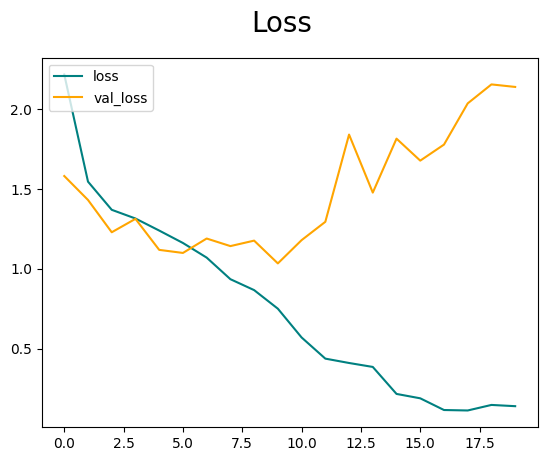

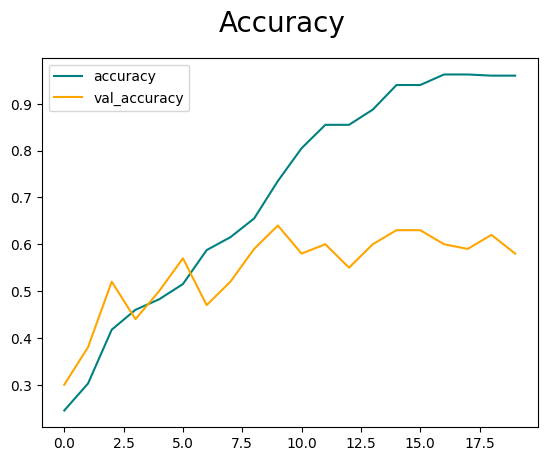

In [35]:
# Plotting training and validation loss over epochs
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend (loc="upper left")
plt.show()

# Plotting training and validation accuracy over epochs
fig =plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend (loc="upper left")
plt.show()

In [38]:
# evaluate the model
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print('Loss: {:.3f}\nAccuracy: {:.3f}'.format(loss, acc))

Loss: 2.137
Accuracy: 0.580
